In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/HamoyeInternship/Team_Algorithm/cve_merged.csv")
df.head()

,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,vendor,vulnerable_product,Pub_Year,Mod_Year,Qualitative_cvss
0,CVE-2019-2211,2019-11-14 21:36:00,2019-11-13 18:15:00,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,google,android,2019,2019,High
1,CVE-2019-2212,2019-11-14 21:30:00,2019-11-13 18:15:00,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,google,android,2019,2019,Medium
2,CVE-2019-2213,2019-11-14 21:24:00,2019-11-13 18:15:00,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,google,android,2019,2019,Medium
3,CVE-2019-2214,2019-11-14 21:19:00,2019-11-13 18:15:00,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,google,android,2019,2019,High
4,CVE-2019-18793,2019-11-14 21:14:00,2019-11-13 20:15:00,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,parallels,parallels_plesk_panel,2019,2019,Medium


In [3]:
selected_columns = df.columns[5:13]
df = df.loc[:,selected_columns]
df.head()

,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE
1,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE
2,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE
3,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
4,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL


In [4]:
def join_text(cols):
     cwe = cols[0]
     summary = cols[1]
     return cwe + " " + summary
df["cwe_summary"] =  df[["cwe_name","summary"]].apply(join_text,axis=1)

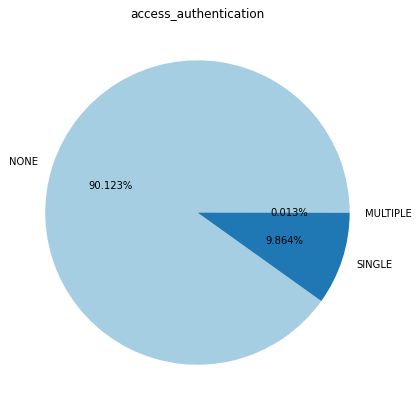

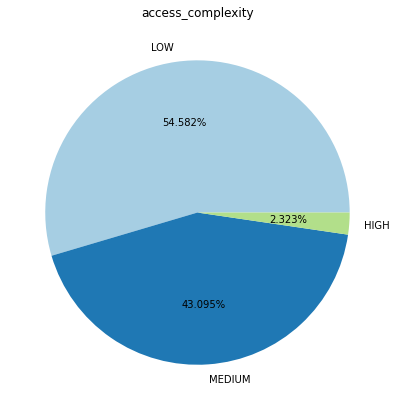

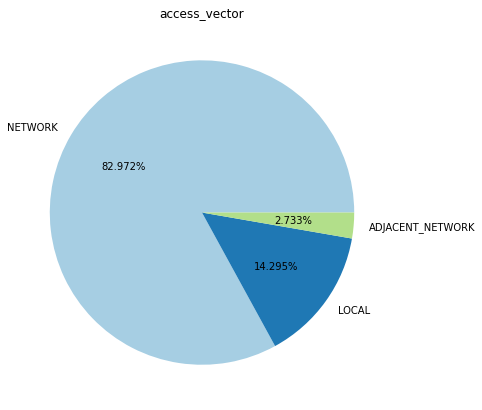

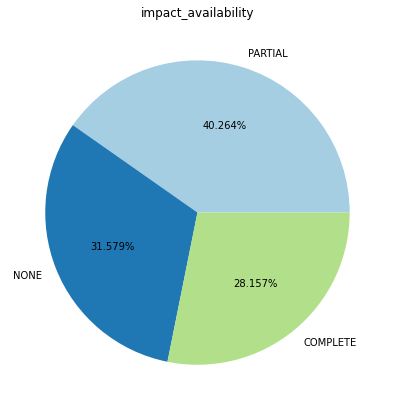

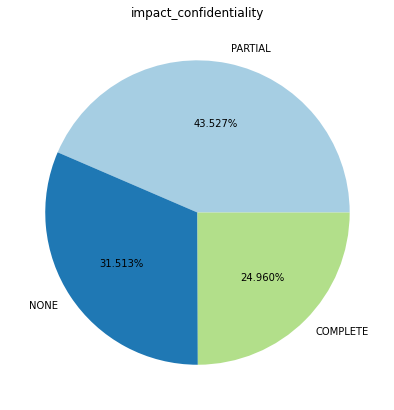

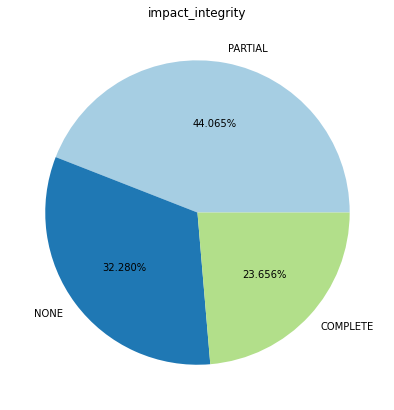

In [5]:
#Plot pie chart of each target variable
target_cols = ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality','impact_integrity']
for feature in target_cols:
    plt.figure(figsize=(10,7))
    data =df[feature].value_counts().values
    labels = df[feature].value_counts().index

    #Read in Seaborn color palette
    plt.title(feature)
    colors = sns.color_palette('Paired')[0:4]

    #Create pie chart with Matplotlib
    plt.pie(data, labels = labels, colors = colors, autopct='%1.3f%%')
    print()
    plt.show()

## Text Cleaning and preprocessing

Text will be preprocessed, the summary of the vulnerability will be picked as the input vector for now

In [6]:
df.drop_duplicates(keep=False, inplace=True)
df.reset_index(inplace=True,drop=True)

In [9]:
#Disaply Random texts
for i in range(1,21):
    print(i,":",df["summary"].loc[i])
    print()

1 : In poisson_distribution of random, there is an out of bounds read. This could lead to local information disclosure with no additional execution privileges needed. User interaction is not needed for exploitation.Product: AndroidVersions: Android-8.0 Android-8.1 Android-9 Android-10Android ID: A-139690488

2 : In binder_free_transaction of binder.c, there is a possible use-after-free due to a race condition. This could lead to local escalation of privilege with no additional execution privileges needed. User interaction is not needed for exploitation.Product: AndroidVersions: Android kernelAndroid ID: A-133758011References: Upstream kernel

3 : In binder_transaction of binder.c, there is a possible out of bounds write due to a missing bounds check. This could lead to local escalation of privilege with no additional execution privileges needed. User interaction is not needed for exploitation.Product: AndroidVersions: Android kernelAndroid ID: A-136210786References: Upstream kernel

4 

In [7]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['summary'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
df["lemm_summary"] = corpus

In [12]:
df.head()

,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,cwe_summary,lemm_summary
0,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,Improper Neutralization of Special Elements u...,createprojectionmapforquery tvprovider java po...
1,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,Information Exposure In poisson_distribution ...,poisson distribution random bound read could l...
2,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,Use After Free In binder_free_transaction of ...,binder free transaction binder c possible use ...
3,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,Improper Privilege Management In binder_trans...,binder transaction binder c possible bound wri...
4,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,Improper Neutralization of Input During Web P...,parallel plesk panel allows x target locale tr...


In [16]:
df["access_authentication"].value_counts()

NONE        56006
SINGLE       9613
MULTIPLE       18
Name: access_authentication, dtype: int64

In [18]:
df["access_vector"].value_counts()

NETWORK             56606
LOCAL                6889
ADJACENT_NETWORK     2142
Name: access_vector, dtype: int64

In [107]:
df.columns

Index(['cwe_name', 'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity', 'cwe_summary'],
      dtype='object')

**Perform startified shuffle split on multi-ouput labels and input text**

In [13]:
# Features & Labels
x_new = df['lemm_summary']
y1 = df["access_authentication"]
y2 = df["access_complexity"]
y3 = df["access_vector"]
y4 = df["impact_availability"]
y5 = df["impact_confidentiality"]
y6 = df["impact_integrity"]
#y= df[['access_authentication','access_vector']]
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
#access_authentication
for train,test in splitter.split(x_new,y1):
      x_train = x_new.loc[train]
      y_train1 = y1.loc[train]
      x_test = x_new.loc[test] 
      y_test1 = y1.loc[test]
#access_complexity
for train,test in splitter.split(x_new,y2):
      x_train = x_new.loc[train]
      y_train2 = y2.loc[train]
      x_test = x_new.loc[test] 
      y_test2 = y2.loc[test]
#access_vector
for train,test in splitter.split(x_new,y3):
      x_train = x_new.loc[train]
      y_train3 = y3.loc[train]
      x_test = x_new.loc[test] 
      y_test3 = y3.loc[test]
#impact_availability
for train,test in splitter.split(x_new,y4):
      x_train = x_new.loc[train]
      y_train4 = y4.loc[train]
      x_test = x_new.loc[test] 
      y_test4 = y4.loc[test]
#impact_confidentiality
for train,test in splitter.split(x_new,y5):
      x_train = x_new.loc[train]
      y_train5 = y5.loc[train]
      x_test = x_new.loc[test] 
      y_test5 = y5.loc[test]
#impact_integrity
for train,test in splitter.split(x_new,y6):
      x_train = x_new.loc[train]
      y_train6 = y6.loc[train]
      x_test = x_new.loc[test] 
      y_test6 = y6.loc[test]

In [14]:
#Create dataframe for target  tarining set
Y_train = pd.DataFrame()
y_trains_list = [y_train1,y_train2,y_train3,y_train4,y_train5,y_train6]
multi_targets =  ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']

for target,data in zip(multi_targets,y_trains_list):
  Y_train[target] = list(data)
Y_train.head()

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,SINGLE,LOW,NETWORK,PARTIAL,NONE,PARTIAL
1,NONE,LOW,NETWORK,PARTIAL,NONE,NONE
2,NONE,LOW,NETWORK,NONE,PARTIAL,PARTIAL
3,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL
4,NONE,LOW,NETWORK,NONE,NONE,PARTIAL


In [15]:
#Create dataframe for target  test set
Y_test = pd.DataFrame()
y_test_list = [y_test1,y_test2,y_test3,y_test4,y_test5,y_test6]
multi_targets =  ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']

for target,data in zip(multi_targets,y_test_list):
  Y_test[target] = list(data)
Y_test.head()

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,NONE,LOW,NETWORK,PARTIAL,PARTIAL,COMPLETE
1,NONE,MEDIUM,NETWORK,COMPLETE,COMPLETE,PARTIAL
2,NONE,MEDIUM,LOCAL,NONE,PARTIAL,PARTIAL
3,NONE,LOW,NETWORK,NONE,PARTIAL,PARTIAL
4,NONE,MEDIUM,NETWORK,NONE,PARTIAL,NONE


In [114]:
Y_train.isnull().sum()

access_authentication     0
access_complexity         0
access_vector             0
impact_availability       0
impact_confidentiality    0
impact_integrity          0
dtype: int64

In [16]:
x_train.reset_index(drop=True)
Y_train.reset_index(drop=True) 

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,SINGLE,LOW,NETWORK,PARTIAL,NONE,PARTIAL
1,NONE,LOW,NETWORK,PARTIAL,NONE,NONE
2,NONE,LOW,NETWORK,NONE,PARTIAL,PARTIAL
3,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL
4,NONE,LOW,NETWORK,NONE,NONE,PARTIAL
...,...,...,...,...,...,...
52504,NONE,LOW,NETWORK,PARTIAL,NONE,NONE
52505,SINGLE,MEDIUM,NETWORK,NONE,PARTIAL,PARTIAL
52506,NONE,LOW,LOCAL,COMPLETE,PARTIAL,NONE
52507,NONE,LOW,NETWORK,PARTIAL,PARTIAL,NONE


In [17]:
# Load Pkgs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

**Training with losgistic regression**

In [20]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer(max_features=3000)),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression()))])

In [21]:
# Fit on Dataset
pipe_lr.fit(x_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('cv', CountVectorizer(max_features=3000)),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [22]:
preds = pipe_lr.predict(x_test)

In [23]:
preds

array([['NONE', 'LOW', 'NETWORK', 'PARTIAL', 'NONE', 'COMPLETE'],
       ['NONE', 'MEDIUM', 'NETWORK', 'NONE', 'PARTIAL', 'PARTIAL'],
       ['NONE', 'LOW', 'NETWORK', 'NONE', 'PARTIAL', 'PARTIAL'],
       ...,
       ['NONE', 'MEDIUM', 'NETWORK', 'PARTIAL', 'PARTIAL', 'COMPLETE'],
       ['NONE', 'LOW', 'NETWORK', 'NONE', 'PARTIAL', 'PARTIAL'],
       ['NONE', 'MEDIUM', 'NETWORK', 'PARTIAL', 'NONE', 'NONE']],
      dtype=object)

In [24]:
#Make dataframe for predictions
preds_df = pd.DataFrame(preds,columns=multi_targets)
preds_df.head()

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,NONE,LOW,NETWORK,PARTIAL,NONE,COMPLETE
1,NONE,MEDIUM,NETWORK,NONE,PARTIAL,PARTIAL
2,NONE,LOW,NETWORK,NONE,PARTIAL,PARTIAL
3,NONE,LOW,NETWORK,NONE,PARTIAL,COMPLETE
4,NONE,LOW,NETWORK,PARTIAL,PARTIAL,NONE


In [25]:
cols = ['access_authentication', 'access_complexity','access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']
for feature in cols:
  print(feature)
  print(df[feature].unique())
  print()

access_authentication
['NONE' 'SINGLE' 'MULTIPLE']

access_complexity
['LOW' 'MEDIUM' 'HIGH']

access_vector
['NETWORK' 'LOCAL' 'ADJACENT_NETWORK']

impact_availability
['NONE' 'COMPLETE' 'PARTIAL']

impact_confidentiality
['COMPLETE' 'NONE' 'PARTIAL']

impact_integrity
['NONE' 'COMPLETE' 'PARTIAL']



In [26]:
#Create dictionary to encode target features
target_dic = {}
labels = [0,1,2]
for feature in cols:
      res = {}
      test_keys = df[feature].unique()
      for key,label in zip(test_keys,labels):
        res[key] = label
        
      target_dic[feature] = res
  
  

In [27]:
target_dic

{'access_authentication': {'NONE': 0, 'SINGLE': 1, 'MULTIPLE': 2},
 'access_complexity': {'LOW': 0, 'MEDIUM': 1, 'HIGH': 2},
 'access_vector': {'NETWORK': 0, 'LOCAL': 1, 'ADJACENT_NETWORK': 2},
 'impact_availability': {'NONE': 0, 'COMPLETE': 1, 'PARTIAL': 2},
 'impact_confidentiality': {'COMPLETE': 0, 'NONE': 1, 'PARTIAL': 2},
 'impact_integrity': {'NONE': 0, 'COMPLETE': 1, 'PARTIAL': 2}}

**Evaluate model performance**

In [28]:
headers = ["Model_Name"]  + multi_targets
print(headers)

['Model_Name', 'access_authentication', 'access_complexity', 'access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']


In [29]:
from sklearn.metrics import f1_score,classification_report
def evaluate_model(model_name,feature_list,preds_df):
      f1_score_features = []
      for i in feature_list:
          y_true = list(Y_test[i])
          y_pred = list(preds_df[i])
          feat_dic = target_dic[i]
          encode_y_true = [feat_dic[x] for x in y_true]
          encode_y_pred = [feat_dic[x] for x in y_pred]
          f1 = f1_score(encode_y_true,encode_y_pred,average="weighted")
          print(i)
          print(classification_report(encode_y_true,encode_y_pred))
          print()
          f1_score_features.append(f1)
      headers = ["Model_Name"]  + feature_list
      data =[ [model_name] + f1_score_features]
      model_df = pd.DataFrame(columns=headers, data=data)
      return model_df
                   

lr_df = evaluate_model("Linear_Regression",multi_targets,preds_df)

access_authentication
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     11202
           1       0.14      0.01      0.01      1923
           2       0.00      0.00      0.00         3

    accuracy                           0.85     13128
   macro avg       0.33      0.33      0.31     13128
weighted avg       0.75      0.85      0.78     13128


access_complexity
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      6812
           1       0.45      0.36      0.40      5981
           2       0.00      0.00      0.00       335

    accuracy                           0.49     13128
   macro avg       0.32      0.33      0.32     13128
weighted avg       0.48      0.49      0.48     13128


access_vector
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     11322
           1       0.09      0.01      0.01      1378
           2       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.19      0.03      0.04      2042
           1       0.34      0.20      0.25      4598
           2       0.49      0.77      0.60      6488

    accuracy                           0.45     13128
   macro avg       0.34      0.33      0.30     13128
weighted avg       0.39      0.45      0.39     13128


impact_integrity
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3647
           1       0.74      0.70      0.72      1966
           2       0.87      0.89      0.88      7515

    accuracy                           0.85     13128
   macro avg       0.82      0.81      0.82     13128
weighted avg       0.85      0.85      0.85     13128




In [132]:
lr_df

,Model_Name,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Linear_Regression,0.780614,0.479908,0.792242,0.368647,0.405517,0.861694


**Training with random forest**

In [135]:
from sklearn.ensemble import RandomForestClassifier
pipe_random_f = Pipeline(steps=[('cv',CountVectorizer()),
                          ('lr_multi',MultiOutputClassifier(RandomForestClassifier()))])
# Fit on Dataset
pipe_random_f.fit(x_train,Y_train)


Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [136]:
import os
os.chdir("/content/drive/MyDrive/HamoyeInternship/Team_Algorithm")
import joblib
joblib.dump(pipe_random_f,'randomforest_pipeline.joblib')

['randomforest_pipeline.joblib']

In [144]:
pipe_random_f.predict(["hi lets see what"])

array([['NONE', 'LOW', 'NETWORK', 'PARTIAL', 'PARTIAL', 'PARTIAL']],
      dtype=object)

In [137]:
pred_rfc = pipe_random_f.predict(x_test)
#Make dataframe for predictions
preds_df_rfc = pd.DataFrame(pred_rfc,columns=multi_targets)
preds_df_rfc.head()

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,NONE,MEDIUM,NETWORK,PARTIAL,NONE,PARTIAL
1,NONE,MEDIUM,NETWORK,NONE,PARTIAL,PARTIAL
2,NONE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL
3,NONE,LOW,NETWORK,NONE,PARTIAL,PARTIAL
4,NONE,LOW,ADJACENT_NETWORK,PARTIAL,NONE,NONE


In [138]:
random_forest_df = evaluate_model("Random_Forest",multi_targets,preds_df_rfc)

access_authentication
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     11202
           1       0.08      0.01      0.01      1923
           2       0.00      0.00      0.00         3

    accuracy                           0.85     13128
   macro avg       0.31      0.33      0.31     13128
weighted avg       0.74      0.85      0.78     13128


access_complexity
              precision    recall  f1-score   support

           0       0.51      0.71      0.60      6812
           1       0.44      0.27      0.34      5981
           2       0.00      0.00      0.00       335

    accuracy                           0.49     13128
   macro avg       0.32      0.33      0.31     13128
weighted avg       0.47      0.49      0.46     13128


access_vector
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     11322
           1       0.11      0.01      0.01      1378
           2       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.16      0.02      0.03      2042
           1       0.36      0.14      0.20      4598
           2       0.49      0.85      0.62      6488

    accuracy                           0.47     13128
   macro avg       0.34      0.34      0.29     13128
weighted avg       0.40      0.47      0.38     13128


impact_integrity
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3647
           1       0.85      0.64      0.73      1966
           2       0.86      0.94      0.89      7515

    accuracy                           0.87     13128
   macro avg       0.87      0.81      0.83     13128
weighted avg       0.87      0.87      0.86     13128




In [139]:
random_forest_df

,Model_Name,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Random_Forest,0.783201,0.463271,0.797205,0.368835,0.38484,0.862508


In [140]:
#Join data frames

metrics_df = pd.concat([lr_df,random_forest_df],axis=0)

In [141]:
metrics_df.to_csv("Model_performance.csv",index=False)

In [142]:
metrics_df.head()

,Model_Name,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Linear_Regression,0.780614,0.479908,0.792242,0.368647,0.405517,0.861694
0,Random_Forest,0.783201,0.463271,0.797205,0.368835,0.384840,0.862508


In [37]:
perf = pd.read_csv("/content/drive/MyDrive/HamoyeInternship/Team_Algorithm/Model_performance.csv")

**Training with KNNN**

In [30]:
from sklearn.ensemble import RandomForestClassifier
pipe_knn = Pipeline(steps=[('cv',CountVectorizer(max_features=3000)),
                          ('lr_multi',MultiOutputClassifier(KNeighborsClassifier(n_neighbors=4)))])
# Fit on Dataset
pipe_knn.fit(x_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer(max_features=3000)),
                ('lr_multi',
                 MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=4)))])

In [31]:
pred_knn = pipe_knn.predict(x_test)
#Make dataframe for predictions
preds_df_knn = pd.DataFrame(pred_knn,columns=multi_targets)
preds_df_knn.head()

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,NONE,LOW,NETWORK,PARTIAL,NONE,COMPLETE
1,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL
2,NONE,LOW,NETWORK,NONE,NONE,PARTIAL
3,NONE,LOW,NETWORK,COMPLETE,NONE,COMPLETE
4,NONE,LOW,ADJACENT_NETWORK,PARTIAL,NONE,NONE


In [40]:
knn_df = evaluate_model("KNN",multi_targets,preds_df_knn)
perf = pd.concat([perf,knn_df],axis = 0)

access_authentication
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     11202
           1       0.14      0.01      0.02      1923
           2       0.00      0.00      0.00         3

    accuracy                           0.85     13128
   macro avg       0.33      0.33      0.31     13128
weighted avg       0.75      0.85      0.78     13128


access_complexity


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.52      0.73      0.61      6812
           1       0.45      0.25      0.32      5981
           2       0.00      0.00      0.00       335

    accuracy                           0.50     13128
   macro avg       0.32      0.33      0.31     13128
weighted avg       0.47      0.50      0.46     13128


access_vector
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11322
           1       0.09      0.05      0.06      1378
           2       0.02      0.00      0.01       428

    accuracy                           0.82     13128
   macro avg       0.32      0.33      0.32     13128
weighted avg       0.75      0.82      0.78     13128


impact_availability
              precision    recall  f1-score   support

           0       0.40      0.48      0.43      5196
           1       0.17      0.15      0.16      2421
           2       0.43      0.37      

In [41]:
perf.head()

,Model_Name,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Linear_Regression,0.780614,0.479908,0.792242,0.368647,0.405517,0.861694
1,Random_Forest,0.783201,0.463271,0.797205,0.368835,0.384840,0.862508
0,KNN,0.784595,0.462175,0.782125,0.368112,0.395559,0.814918


In [33]:
knn_df.head()

,Model_Name,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Random_Forest,0.784595,0.462175,0.782125,0.368112,0.395559,0.814918


**Training with Support vector machine classifier**

In [35]:
from sklearn.svm import SVC  

In [36]:
from sklearn.ensemble import RandomForestClassifier
pipe_svc = Pipeline(steps=[('cv',CountVectorizer(max_features=3000)),
                          ('lr_multi',MultiOutputClassifier(SVC(gamma='auto')))])
# Fit on Dataset
pipe_svc.fit(x_train,Y_train)

KeyboardInterrupt: ignored

In [ ]:
pred_svc = pipe_knn.predict(x_test)
#Make dataframe for predictions
preds_df_svc = pd.DataFrame(pred_svc,columns=multi_targets)
preds_df_svc.head()

In [38]:
svc_df = evaluate_model("SVM  ",multi_targets,preds_df_svc)
perf = pd.concat([perf,svc_df],axis=0)

NameError: ignored

In [42]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import xgboost as xgb
xgb_classif = xgb.XGBClassifier(random_state=42)
from sklearn.ensemble import RandomForestClassifier
pipe_xgb = Pipeline(steps=[('cv',CountVectorizer(max_features=2500)),
                          ('xgb_multi',MultiOutputClassifier(xgb_classif))])
# Fit on Dataset
pipe_xgb.fit(x_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer(max_features=2500)),
                ('xgb_multi',
                 MultiOutputClassifier(estimator=XGBClassifier(random_state=42)))])

In [48]:
pred_xgb = pipe_xgb.predict(x_test)
#Make dataframe for predictions
preds_df_xgb = pd.DataFrame(pred_xgb,columns=multi_targets)
preds_df_xgb.head()

,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,NONE,LOW,NETWORK,PARTIAL,PARTIAL,COMPLETE
1,NONE,LOW,NETWORK,NONE,PARTIAL,PARTIAL
2,NONE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL
3,NONE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL
4,NONE,LOW,NETWORK,PARTIAL,PARTIAL,NONE


In [49]:
xgb_df = evaluate_model("xgboost",multi_targets,preds_df_xgb)
perf = pd.concat([perf,xgb_df],axis=0)

access_authentication
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     11202
           1       0.00      0.00      0.00      1923
           2       0.00      0.00      0.00         3

    accuracy                           0.85     13128
   macro avg       0.28      0.33      0.31     13128
weighted avg       0.73      0.85      0.79     13128


access_complexity
              precision    recall  f1-score   support

           0       0.52      0.97      0.67      6812
           1       0.44      0.03      0.06      5981
           2       0.00      0.00      0.00       335

    accuracy                           0.52     13128
   macro avg       0.32      0.33      0.24     13128
weighted avg       0.47      0.52      0.38     13128


access_vector
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     11322
           1       0.00      0.00      0.00      1378
           2       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2042
           1       0.29      0.01      0.01      4598
           2       0.49      0.99      0.66      6488

    accuracy                           0.49     13128
   macro avg       0.26      0.33      0.22     13128
weighted avg       0.35      0.49      0.33     13128


impact_integrity
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      3647
           1       0.78      0.61      0.68      1966
           2       0.82      0.92      0.87      7515

    accuracy                           0.83     13128
   macro avg       0.83      0.77      0.79     13128
weighted avg       0.84      0.83      0.83     13128




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
perf.head()

,Model_Name,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,Linear_Regression,0.780614,0.479908,0.792242,0.368647,0.405517,0.861694
1,Random_Forest,0.783201,0.463271,0.797205,0.368835,0.384840,0.862508
0,KNN,0.784595,0.462175,0.782125,0.368112,0.395559,0.814918
0,xgboost,0.785743,0.377013,0.798728,0.292914,0.328395,0.829207
